## **주요 개념 정리**
### **Principal Component Analisys CPA 주성분 분석**
- 이전 장의 과일 data :  10000개의 pixel(100 x 100 size)이 있기 때문에 10000개의 특성이 있다고 할 수 있음
- 차원을 줄이면 저장 공간을 줄이고, 계산량을 줄일 수 있음

> - 2차원 배열에서는 행과 열이 차원
- 1차원 배열에서는 원소의 개수 자체가 차원

- 데이터에 있는 분산이 큰 방향의 벡터를 찾음
- 전체 데이터를 가장 잘 설명하는 벡터

- 주성분은 최대 원본 특성의 개수만틈 찾을 수 있음

```python
# n_components = 50 => 주성분의 개수 지정
# 전체 data shape : (300, 10000) =>  주성분 50개를 구하고 transform하면 (300,50)으로 전체 feature가 10000 -> 50개로 줄어듬
# data shape에서 첫번째 300은 batch dimension / not a feature
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
```
---
#### 원본 데이터 재구성
PCA로 줄인 feature는 다시 원본 data로 복구할 수 있다.

```python
# 원본 data 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
```
---
#### 설명된 분산
- 주성분이 원본 data를 얼마나 잘 나타내는지(잘 설명하는지) 기록한 값 : 설명된 분산
- PCA 클래스의 "explained_variance_ratio_"에 각 주성분의 설명된 분산 비율이 기록되어 있음

> 주성분의 개수 대신 **n_components = 0.n** 으로 설명된 분산의 비율을 입력해줄 수도 있음


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2023-12-03 13:13:01--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-12-03 13:13:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-12-03 13:13:02--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [7]:
# n_components = 50 => 주성분의 개수 지정
# 전체 data shape : (300, 10000) =>  주성분 50개를 구하고 transform하면 (300,50)으로 전체 feature가 10000 -> 50개로 줄어듬
# data shape에서 첫번째 300은 batch dimension / not a feature
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [4]:
print(pca.components_.shape)

(50, 10000)


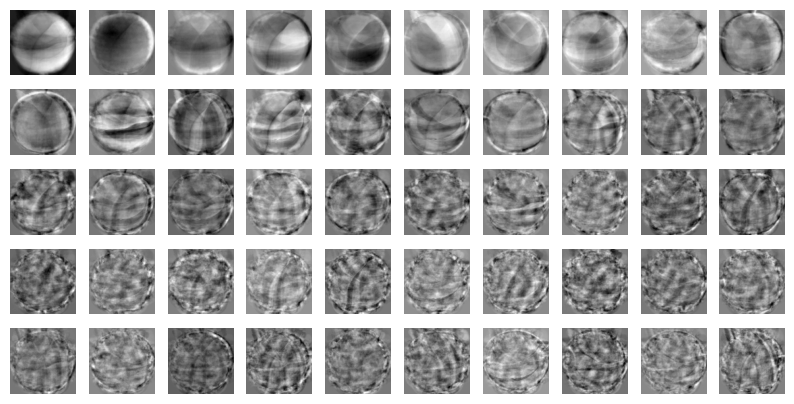

In [6]:
# 이 주성분들은 원본 data에서 가장 분산이 큰 방향을 순서대로 나타낸 것
# data set에 있는 어떤 특징은 잡아낸 것이라고 생각할 수 있음
draw_fruits(pca.components_.reshape(-1,100,100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [10]:
# 원본 data 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


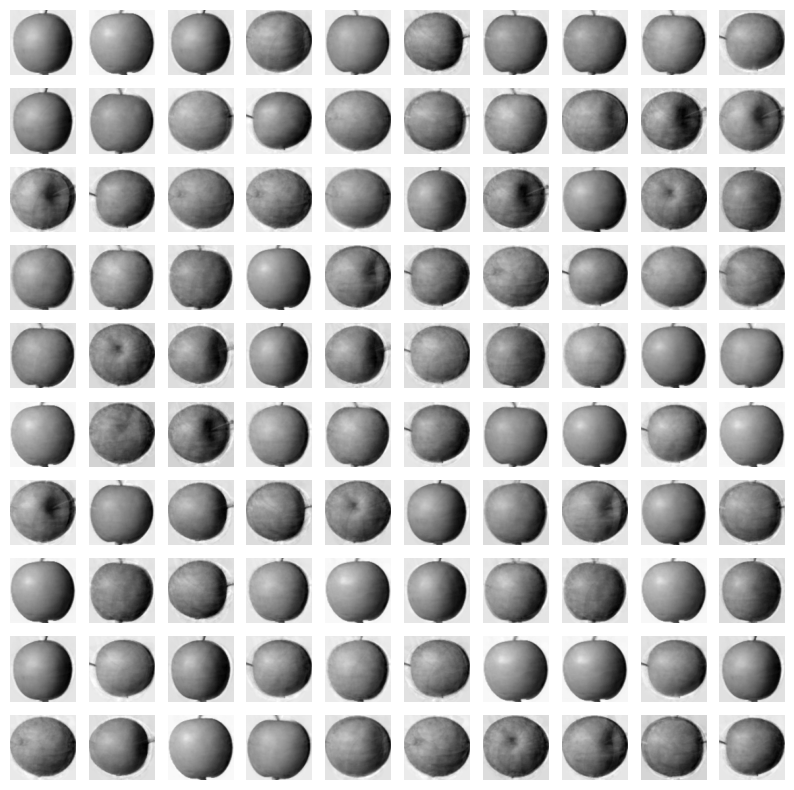

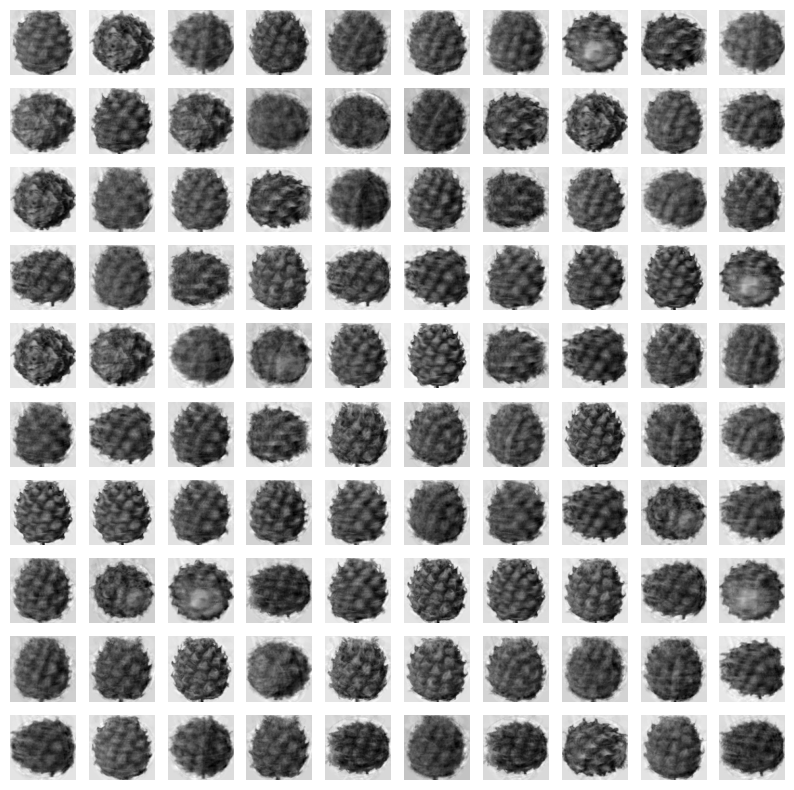

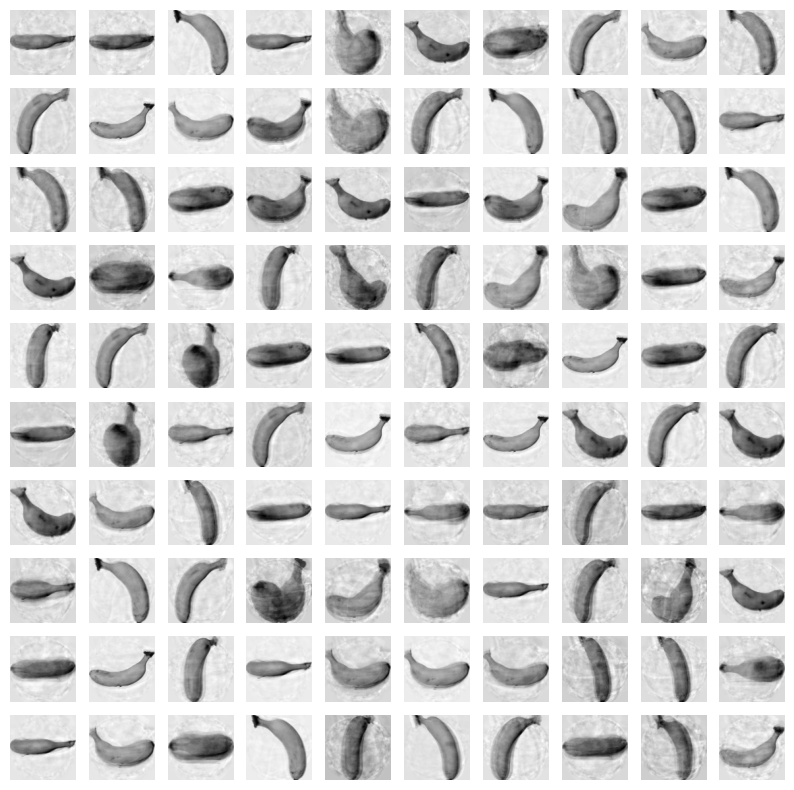

In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [12]:
print(np.sum(pca.explained_variance_ratio_))

0.921495512819321


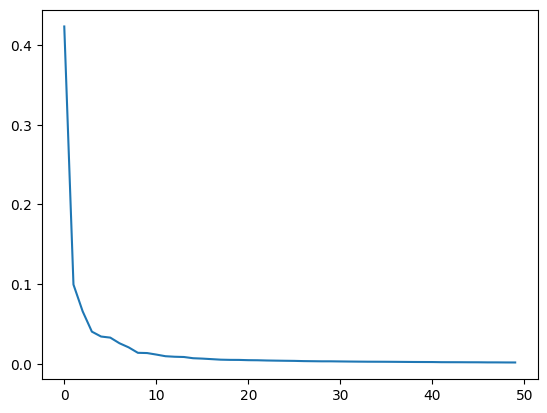

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9077950954437255


In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.06658029556274414


In [18]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
print(pca.n_components_)

2


In [20]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
# 단 2개의 주성분 특징으로도 예측 가능
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.028866291046142578


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [22]:
# 차원 축소된 data를 이용하여 k 평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


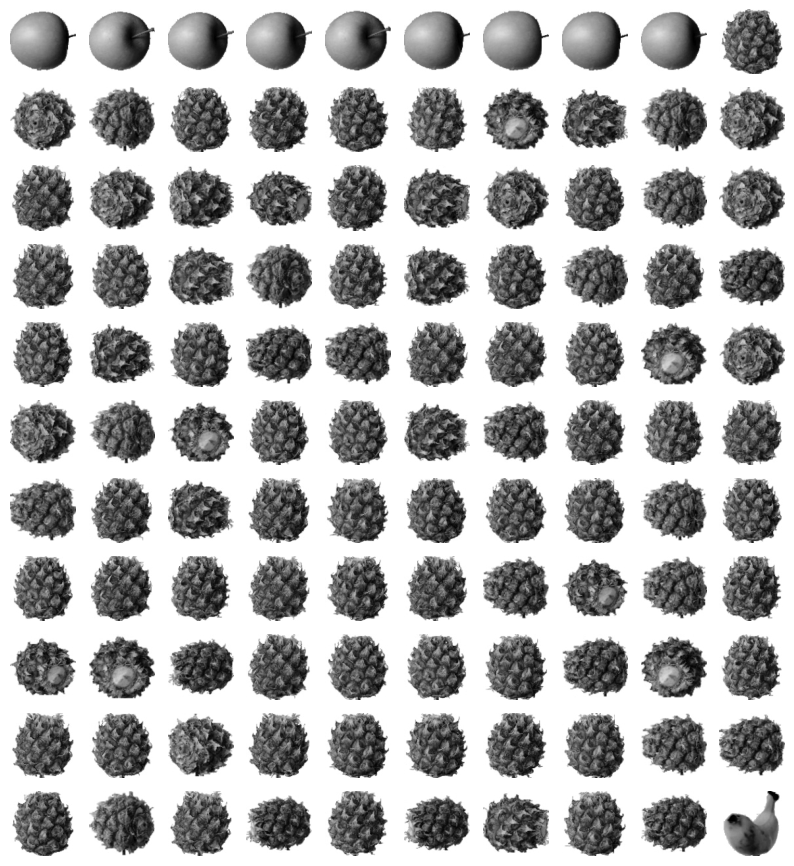

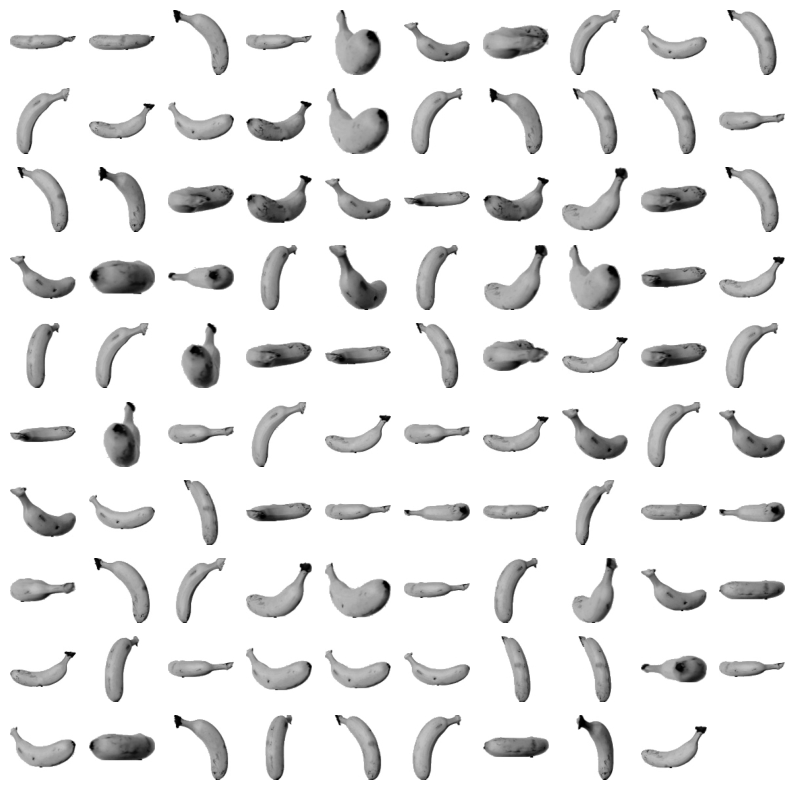

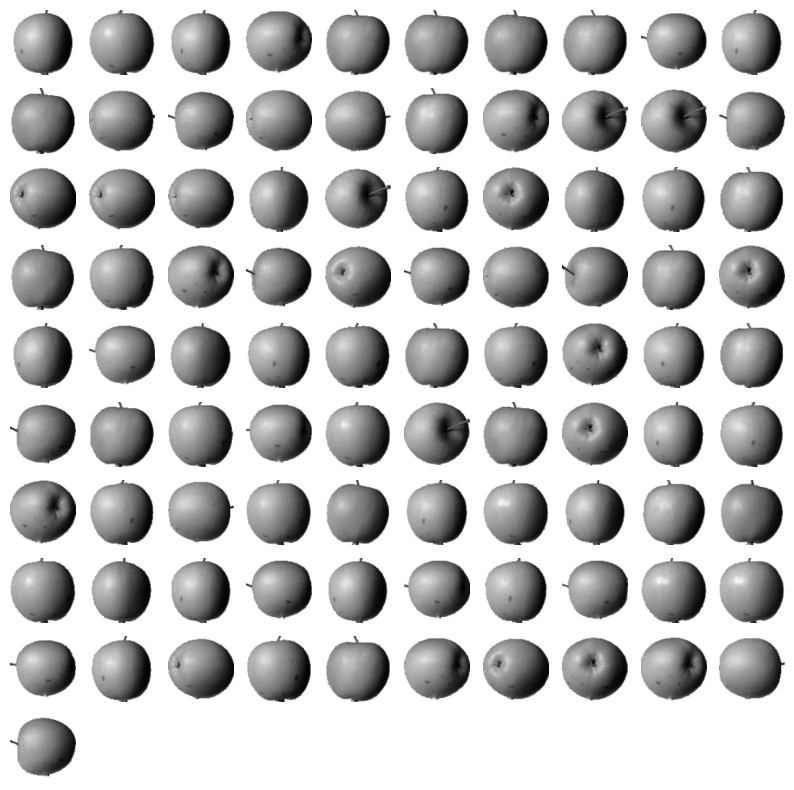

In [23]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

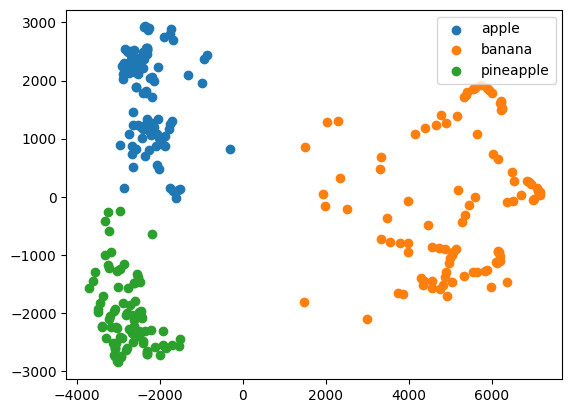

In [26]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
  # data[:,0] : 1번째 주성분, data[:,1] : 2번째 주성분
plt.legend(['apple','banana','pineapple'])
plt.show()